# Titanic: Demographic Dynamics and Survival Prediction

The dataset is available here: https://www.kaggle.com/datasets/pavlofesenko/titanic-extended

In [1]:
# import the things to explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv('./titanic-data-ext/full.csv')
raw_data.shape

(1309, 21)

In [2]:
# verify columns vs. dataset description
raw_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [3]:
raw_data.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
WikiId          True
Name_wiki       True
Age_wiki        True
Hometown        True
Boarded         True
Destination     True
Lifeboat        True
Body            True
Class           True
dtype: bool

In [4]:
df = pd.DataFrame(raw_data)

# if we don't know survival, assume missing and dead
df['Survived'] = df['Survived'].fillna(0.0)
# remove rows where age, pclass, embarked is unknown
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Pclass'])
df = df.dropna(subset=['Embarked'])
df.shape

(1044, 21)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Comparing Survival By Age

In [6]:
# We want to explore by Age, Gender, Passenger Class and Port

# Let's look at the spread of passengers by age
df_age = df['Age'].dropna()

# Calculate mean age
mean_age = df_age.mean()

print(mean_age)

# How many of each age survived?
def plotAgeChart(plotName, df_plot, df_total, mean_data, plotTitle):
    # Plotting
    plt.figure(figsize=(12, 6))

    # Count the occurrences of each age
    p_counts = df_plot.value_counts().sort_index()

    # Count the survivors for each age
    p_survived_counts = df_total[df_total['Survived'] == 1]['Age'].value_counts().sort_index()

    # Plot the bar chart for total counts
    plt.bar(p_counts.index, p_counts.values, color='skyblue', alpha=0.7, label='Total Counts')

    # Plot the bar chart for survivors
    plt.bar(p_survived_counts.index, p_survived_counts.values, color='green', alpha=0.7, label='Survivors')

    # Plot the mean age line
    plt.axvline(x=mean_data, color='red', linestyle='--', label='Mean ' + plotName)

    # Set x-ticks to show ages in steps of 5 and rotate labels
    plt.xticks(range(0, int(max(df_plot)) + 1, 5), [str(int(x)) if x <= 1 else str(int(round(x))) for x in range(0, int(max(df_plot)) + 1, 5)], rotation=45)  # Rotate labels by 45 degrees

    # Adding labels and title
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title(plotTitle)
    plt.legend()

    # Show plot
    plt.show()

29.84259578544061


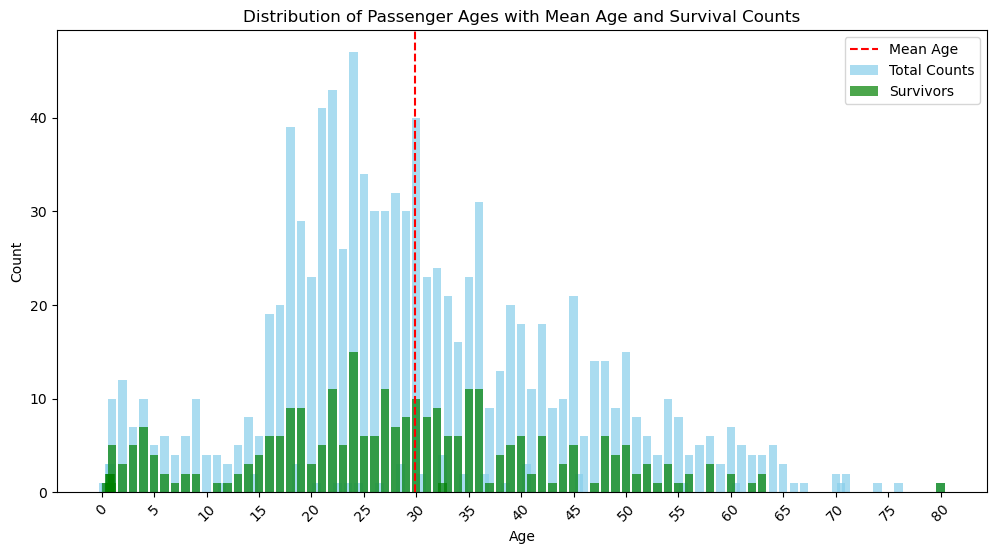

In [7]:
plotAgeChart('Age', df_age, df, mean_age, 'Distribution of Passenger Ages with Mean Age and Survival Counts')

In [8]:
deaths_df = df[(df['Survived'] == 0)]
deaths_age_distribution = deaths_df['Age'].value_counts()

sur_df = df[(df['Survived'] == 1)]
sur_age_distribution = sur_df['Age'].value_counts()

total_passenger_counts = df['Age'].value_counts()

most_deaths_age = deaths_age_distribution.idxmax()
print("Age with the Most Deaths:", most_deaths_age)
print(deaths_age_distribution)
print("Age with the Most Survived:", sur_age_distribution.idxmax())
print(sur_age_distribution)
print(total_passenger_counts)

Age with the Most Deaths: 21.0
Age
21.0    36
22.0    32
24.0    32
18.0    30
30.0    30
        ..
20.5     1
23.5     1
24.5     1
55.5     1
38.5     1
Name: count, Length: 95, dtype: int64
Age with the Most Survived: 24.0
Age
24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
         ..
55.00     1
32.50     1
12.00     1
0.92      1
47.00     1
Name: count, Length: 65, dtype: int64
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


## Comparing Survival of Males vs Females

In [9]:
# Filter the DataFrame to include only female passengers who survived
female_survived_df = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
female_deaths_df = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]

# Calculate the age distribution of female survivors and deaths
female_survived_age_distribution = female_survived_df['Age'].value_counts()
female_deaths_age_distribution = female_deaths_df['Age'].value_counts()

# Get the age with the highest counts
most_female_survivors_age = female_survived_age_distribution.idxmax()
most_female_deaths_age = female_deaths_age_distribution.idxmax()

# Get the age with the lowest count
least_female_survivors_age = female_survived_age_distribution.idxmin()
least_female_deaths_age = female_deaths_age_distribution.idxmin()

print("Age with the Most Female Survivors:", most_female_survivors_age)
print("Age with the Least Female Survivors:", least_female_survivors_age)
print("Age with the Most Female Deaths:", most_female_deaths_age)
print("Age with the Least Female Deaths:", least_female_deaths_age)

Age with the Most Female Survivors: 24.0
Age with the Least Female Survivors: 55.0
Age with the Most Female Deaths: 18.0
Age with the Least Female Deaths: 58.0


In [10]:
# Filter the DataFrame to include only male passengers who survived
male_survived_df = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]

male_death_df = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]

# Calculate the age distribution of male survivors and deaths
male_survived_age_distribution = male_survived_df['Age'].value_counts()
male_death_age_distribution = male_death_df['Age'].value_counts()

# Get the age with the highest counts
most_male_survivors_age = male_survived_age_distribution.idxmax()
most_male_deaths_age = male_death_age_distribution.idxmax()

# Get the age with the lowest count
least_male_survivors_age = male_survived_age_distribution.idxmin()
least_male_deaths_age = male_death_age_distribution.idxmin()

print("Age with the Most Male Survivors:", most_male_survivors_age)
print("Age with the Least Male Survivors:", least_male_survivors_age)
print("Age with the Most Male Deaths:", most_male_deaths_age)
print("Age with the Least Male Deaths:", least_male_deaths_age)


Age with the Most Male Survivors: 32.0
Age with the Least Male Survivors: 56.0
Age with the Most Male Deaths: 21.0
Age with the Least Male Deaths: 55.5


30.58522796352584


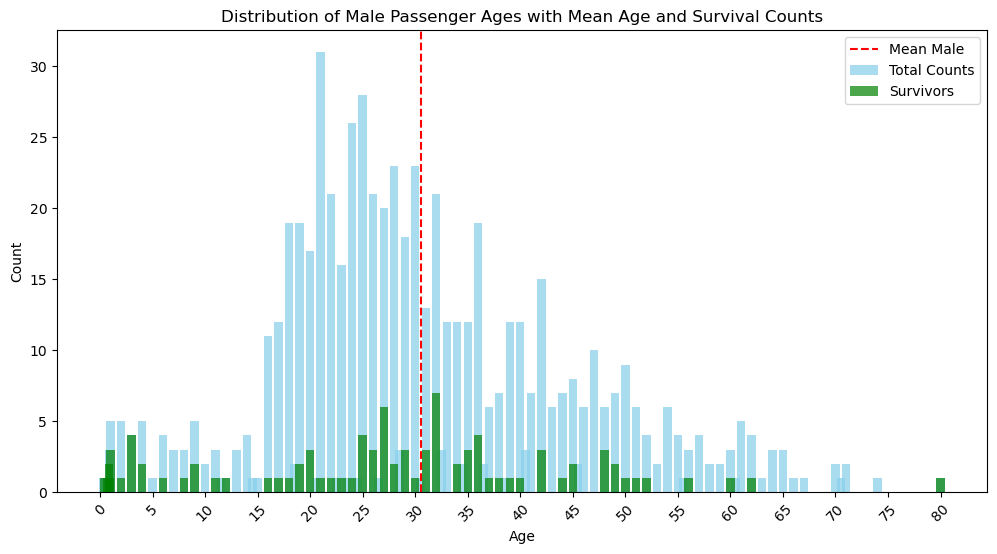

28.576658031088083


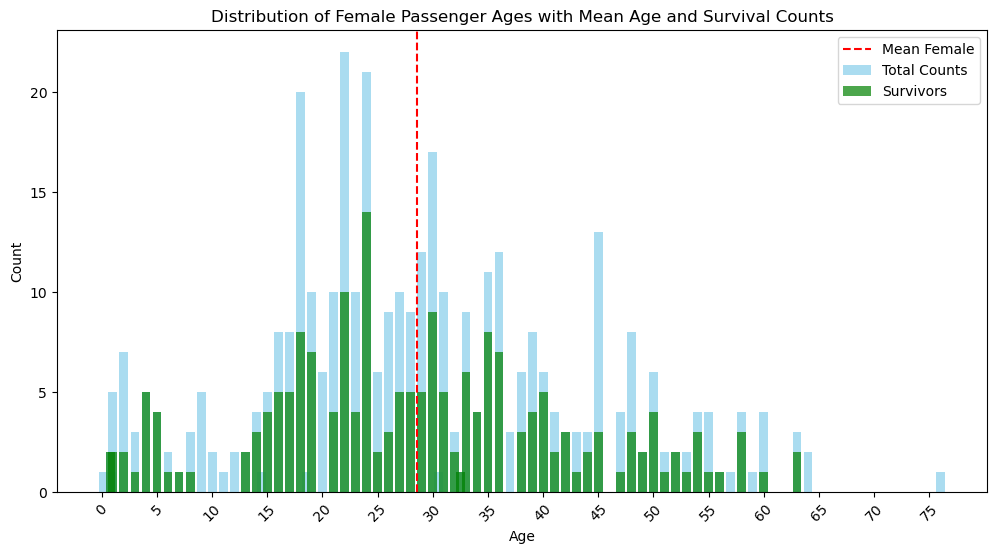

In [11]:
# Male vs Female Survivors

# Filter the DataFrame to include only female passengers
male_df = df[df['Sex'] == 'male']

# Drop NaN values in the 'Age' column
male_age = male_df['Age'].dropna()

# Calculate mean age for female passengers
mean_male_age = male_age.mean()
print(mean_male_age)
plotAgeChart('Male', male_age, male_df, mean_male_age, 'Distribution of Male Passenger Ages with Mean Age and Survival Counts')

# How many Females Survived?

# Filter the DataFrame to include only female passengers
female_df = df[df['Sex'] == 'female']

# Drop NaN values in the 'Age' column
female_age = female_df['Age'].dropna()

# Calculate mean age for female passengers
mean_female_age = female_age.mean()
print(mean_female_age)
plotAgeChart('Female', female_age, female_df, mean_female_age, 'Distribution of Female Passenger Ages with Mean Age and Survival Counts')

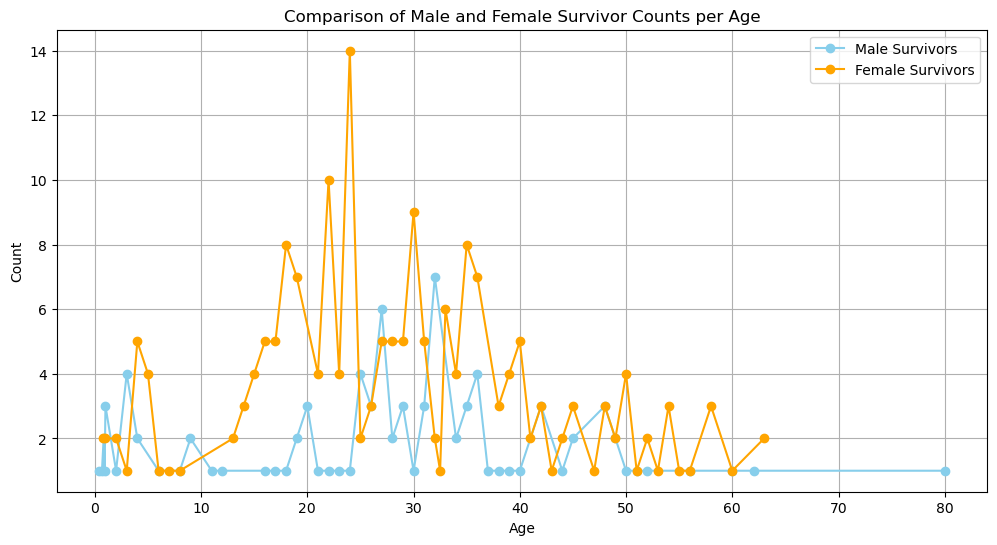

In [12]:
# It appears fewer males survived vs females. Let's look at them on a chart next to eachother

# Plotting
plt.figure(figsize=(12, 6))

# Count the male survivors for each age
male_survived_counts = male_df[male_df['Survived'] == 1]['Age'].value_counts().sort_index()

# Count the female survivors for each age
female_survived_counts = female_df[female_df['Survived'] == 1]['Age'].value_counts().sort_index()

# Plot the line graph for male survivors
plt.plot(male_survived_counts.index, male_survived_counts.values, color='skyblue', marker='o', label='Male Survivors')

# Plot the line graph for female survivors
plt.plot(female_survived_counts.index, female_survived_counts.values, color='orange', marker='o', label='Female Survivors')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Comparison of Male and Female Survivor Counts per Age')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [13]:
# According to the graphs and math, females had a higher overall survival rating.
# Calculate total passengers for each sex
total_passengers_sex = df['Sex'].value_counts()

# Calculate total survivors for each sex
total_survivors_sex = df.groupby('Sex')['Survived'].sum()

# Calculate survival rate for each sex
survival_rate_sex = total_survivors_sex / total_passengers_sex

print("Overall Survival Rate for each Sex:")
print(survival_rate_sex)
print("")
print("Total Passengers per Sex:")
print(total_passengers_sex)
print("")
print("Total Survivors per Sex:")
print(total_survivors_sex)

Overall Survival Rate for each Sex:
Sex
female    0.505181
male      0.141337
dtype: float64

Total Passengers per Sex:
Sex
male      658
female    386
Name: count, dtype: int64

Total Survivors per Sex:
Sex
female    195.0
male       93.0
Name: Survived, dtype: float64


## Comparing Survival By Passenger Class

Routes to the boat deck are shorter for 1st and 2nd class passengers. Did this impact the ability to evacuate?

In [14]:
# Calculate total passengers for each passenger class
total_passengers_class = df['Pclass'].value_counts().sort_index()

# Calculate total survivors for each passenger class
total_survivors_class = df.groupby('Pclass')['Survived'].sum()

# Calculate survival rate for each passenger class
survival_rate_class = total_survivors_class / total_passengers_class

print("Total Passengers per Passenger Class:")
print(total_passengers_class)
print("")
print("Overall Survival Rate for each Passenger Class:")
print(survival_rate_class)
print("")
print("Total Survivors each Passenger Class:")
print(total_survivors_class)

Total Passengers per Passenger Class:
Pclass
1    282
2    261
3    501
Name: count, dtype: int64

Overall Survival Rate for each Passenger Class:
Pclass
1    0.425532
2    0.318008
3    0.169661
dtype: float64

Total Survivors each Passenger Class:
Pclass
1    120.0
2     83.0
3     85.0
Name: Survived, dtype: float64


More of 1st class appears to have survived than the other passengers.

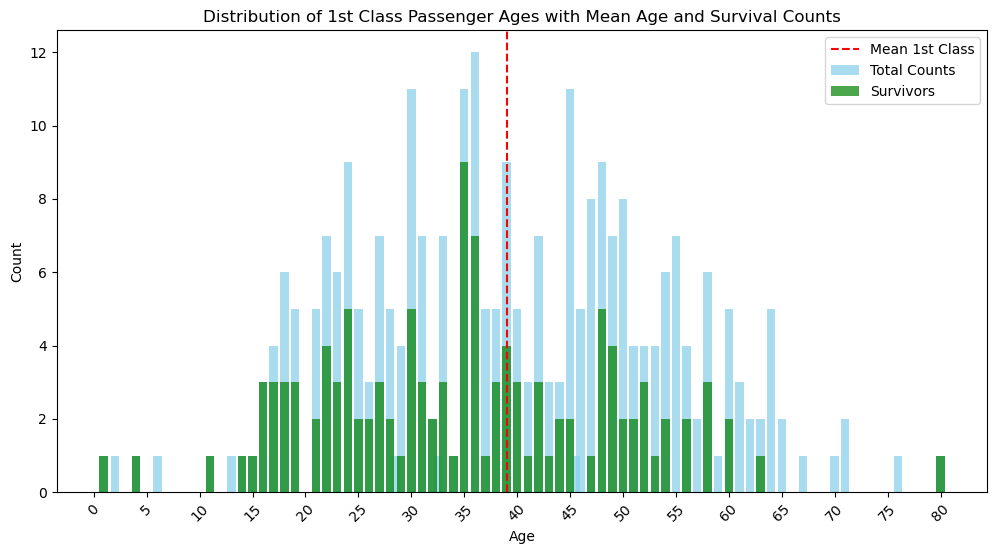

39.08304964539007


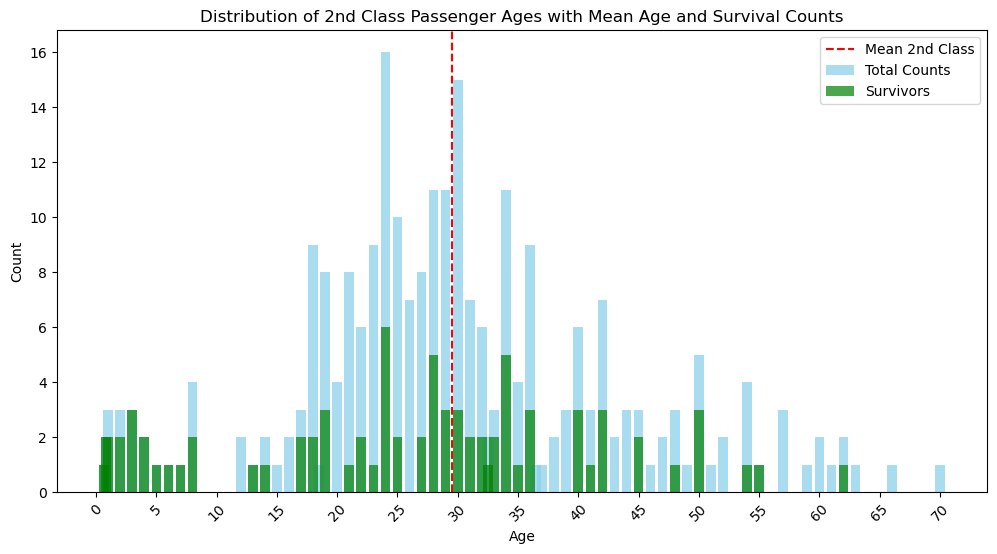

29.506704980842912


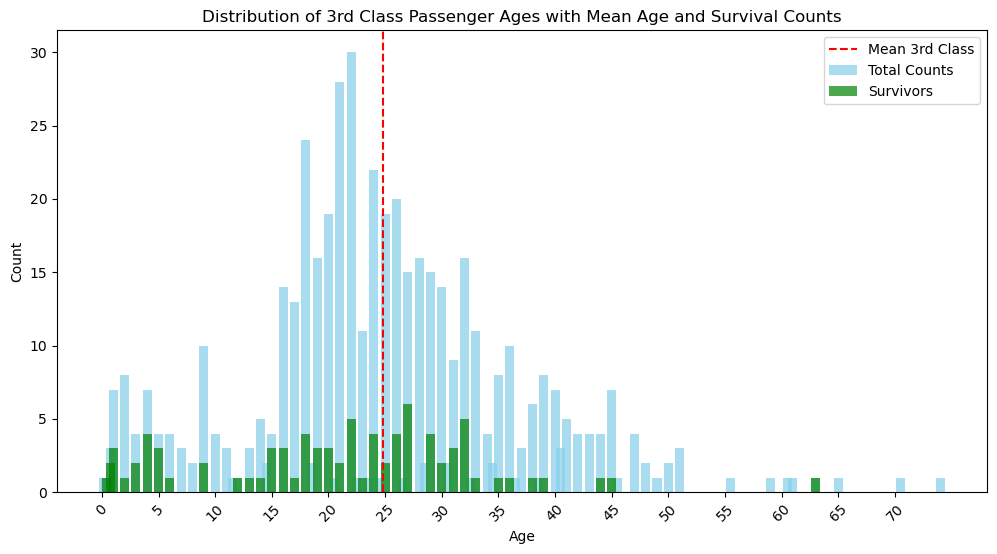

24.81636726546906


In [16]:
# lets break down passenger class by the numbers

def plotClassAges(pclassnum, title1):
    chart_title = 'Distribution of ' + title1 + ' Passenger Ages with Mean Age and Survival Counts'
    # Filter the DataFrame to include only female passengers
    fc_df = df[df['Pclass'] == pclassnum]

    # Drop NaN values in the 'Age' column
    fc_age = fc_df['Age'].dropna()

    # Calculate mean age
    mean_fc_age = fc_age.mean()
    plotAgeChart(title1, fc_age, fc_df, mean_fc_age, chart_title)
    print(mean_fc_age)

plotClassAges(1, '1st Class')
plotClassAges(2, '2nd Class')
plotClassAges(3, '3rd Class')

In [27]:
def mostDeathPerClass(classid):
    md_df = df[df['Pclass'] == classid]
    md_death_df = df[(df['Pclass'] == classid) & (df['Survived'] == 0)]
    md_death_counts = md_df[md_df['Survived'] == 0]['Age'].value_counts().sort_index()
    md_death_age_distribution = md_death_df['Age'].value_counts()    
    print(md_death_age_distribution)

def mostLivesPerClass(classid):
    md_df = df[df['Pclass'] == classid]
    md_death_df = df[(df['Pclass'] == classid) & (df['Survived'] == 1)]
    md_death_counts = md_df[md_df['Survived'] == 1]['Age'].value_counts().sort_index()
    md_death_age_distribution = md_death_df['Age'].value_counts()    
    print(md_death_age_distribution)
    
mostDeathPerClass(1)
#mostLivesPerClass(3)

Age
45.0    9
55.0    7
47.0    7
30.0    6
50.0    6
64.0    5
36.0    5
46.0    5
39.0    5
54.0    4
31.0    4
37.0    4
24.0    4
33.0    4
42.0    4
48.0    4
27.0    4
22.0    3
49.0    3
60.0    3
23.0    3
18.0    3
25.0    3
53.0    3
58.0    3
29.0    3
61.0    3
21.0    3
28.0    3
71.0    2
57.0    2
35.0    2
40.0    2
41.0    2
38.0    2
65.0    2
43.0    2
51.0    2
19.0    2
56.0    2
62.0    2
26.0    1
76.0    1
6.0     1
59.0    1
63.0    1
2.0     1
13.0    1
67.0    1
32.5    1
28.5    1
52.0    1
45.5    1
70.0    1
44.0    1
17.0    1
Name: count, dtype: int64


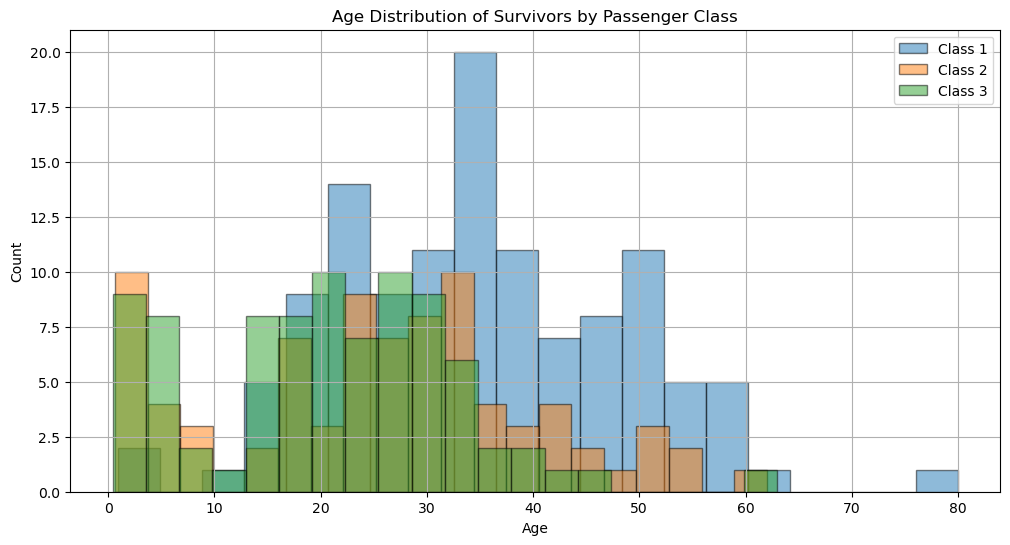

In [17]:
# Filter the DataFrame to include only passengers who survived
survived_df = df[df['Survived'] == 1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot histograms for each passenger class
for pclass in sorted(survived_df['Pclass'].unique()):
    # Filter the DataFrame for each passenger class
    pclass_df = survived_df[survived_df['Pclass'] == pclass]
    # Plot the histogram
    plt.hist(pclass_df['Age'], bins=20, alpha=0.5, label=f'Class {pclass}', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survivors by Passenger Class')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Comparing Survival By Embarkation Port

In [18]:
# Calculate total passengers for each passenger class
total_embarked = df['Embarked'].value_counts().sort_index()

# Calculate total survivors for each passenger class
total_survivors_embarked = df.groupby('Embarked')['Survived'].sum()

# Calculate survival rate for each passenger class
survival_rate_embarked = total_survivors_embarked / total_embarked

survival_rate_overall_survivors = total_survivors_embarked / total_survivors_embarked.sum()

survival_rate_overall = total_survivors_embarked / 1044

print("Total Survivors")
print(total_survivors_embarked.sum())
print(" ")

print("Total Passengers by Port of Embarkation:")
print(total_embarked)
print(" ")

print("Total Survivors by Port of Embarkation:")
print(total_survivors_embarked)

Total Survivors
288.0
 
Total Passengers by Port of Embarkation:
Embarked
C    212
Q     50
S    782
Name: count, dtype: int64
 
Total Survivors by Port of Embarkation:
Embarked
C     79.0
Q      8.0
S    201.0
Name: Survived, dtype: float64


In [19]:
print("Survival Rate vs All Passengers")
print(survival_rate_overall)
print(" ")

print("Survival Rate vs All Survivors")
print(survival_rate_overall_survivors)
print(" ")
print("Survival Rate vs Passengers from Same Port:")
print(survival_rate_embarked)

Survival Rate vs All Passengers
Embarked
C    0.075670
Q    0.007663
S    0.192529
Name: Survived, dtype: float64
 
Survival Rate vs All Survivors
Embarked
C    0.274306
Q    0.027778
S    0.697917
Name: Survived, dtype: float64
 
Survival Rate vs Passengers from Same Port:
Embarked
C    0.372642
Q    0.160000
S    0.257033
dtype: float64


In [20]:
# total survivors per port and sex
female_survived_df = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
male_survived_df = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
female_survivors_embarked = female_survived_df.groupby('Embarked')['Survived'].sum()
male_survivors_embarked = male_survived_df.groupby('Embarked')['Survived'].sum()

print("Female by Port of Embarkation:")
print(female_survivors_embarked)
print(" ")

print("Male by Port of Embarkation:")
print(male_survivors_embarked)
print(" ")

Female by Port of Embarkation:
Embarked
C     55.0
Q      7.0
S    133.0
Name: Survived, dtype: float64
 
Male by Port of Embarkation:
Embarked
C    24.0
Q     1.0
S    68.0
Name: Survived, dtype: float64
 


In [21]:
# total survivors per port and pclass
q_survived_df = df[(df['Embarked'] == 'Q') & (df['Survived'] == 1)]
s_survived_df = df[(df['Embarked'] == 'S') & (df['Survived'] == 1)]
c_survived_df = df[(df['Embarked'] == 'C') & (df['Survived'] == 1)]
q_survivors_embarked = q_survived_df.groupby('Pclass')['Survived'].sum()
s_survivors_embarked = s_survived_df.groupby('Pclass')['Survived'].sum()
c_survivors_embarked = c_survived_df.groupby('Pclass')['Survived'].sum()

print("Class Survived by Port of Embarkation:")
print("Queenstown:", q_survivors_embarked)
print("Southampton:", s_survivors_embarked)
print("Cherbourg:", c_survivors_embarked)

Class Survived by Port of Embarkation:
Queenstown: Pclass
1    1.0
2    1.0
3    6.0
Name: Survived, dtype: float64
Southampton: Pclass
1    66.0
2    74.0
3    61.0
Name: Survived, dtype: float64
Cherbourg: Pclass
1    53.0
2     8.0
3    18.0
Name: Survived, dtype: float64


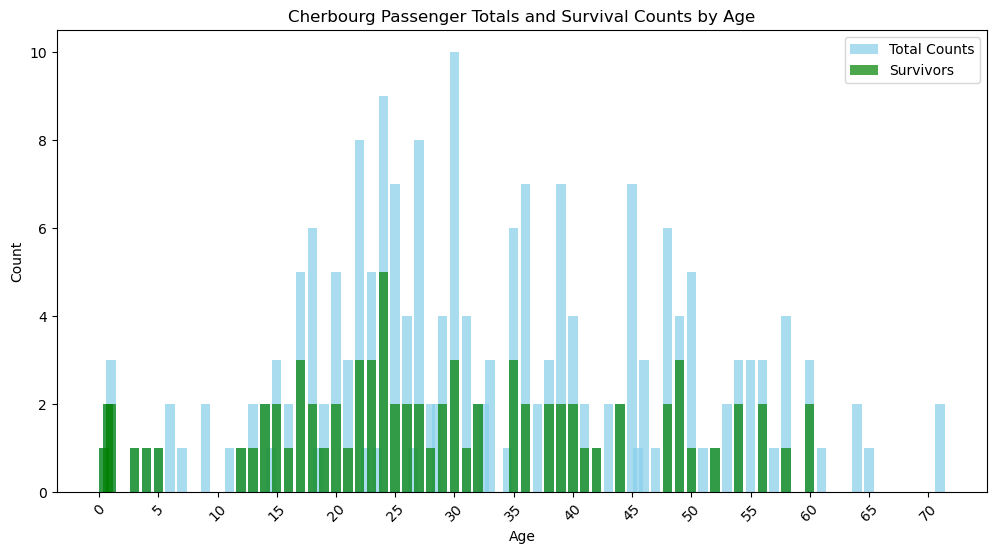

In [22]:
# putting this in a function since we are running it 3 times
def plotPortAges(portId, portName):
    # Ages of passengers from port
    df_c = df[(df['Embarked'] == portId)]
    df_c_age = df_c['Age'].dropna()

    # Plotting
    plt.figure(figsize=(12, 6))

    # Count the occurrences of each age
    c_age_counts = df_c_age.value_counts().sort_index()

    # Count the survivors for each age
    s_survived_counts = df_c[df_c['Survived'] == 1]['Age'].value_counts().sort_index()

    # Plot the bar chart for total counts
    plt.bar(c_age_counts.index, c_age_counts.values, color='skyblue', alpha=0.7, label='Total Counts')

    # Plot the bar chart for survivors
    plt.bar(s_survived_counts.index, s_survived_counts.values, color='green', alpha=0.7, label='Survivors')

    # Set x-ticks to show ages in steps of 5 and rotate labels
    plt.xticks(range(0, int(max(df_c_age)) + 1, 5), [str(int(x)) if x <= 1 else str(int(round(x))) for x in range(0, int(max(df_c_age)) + 1, 5)], rotation=45)  # Rotate labels by 45 degrees

    # Adding labels and title
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title(portName + ' Passenger Totals and Survival Counts by Age')
    plt.legend()

    # Show plot
    plt.show()

plotPortAges('C','Cherbourg')

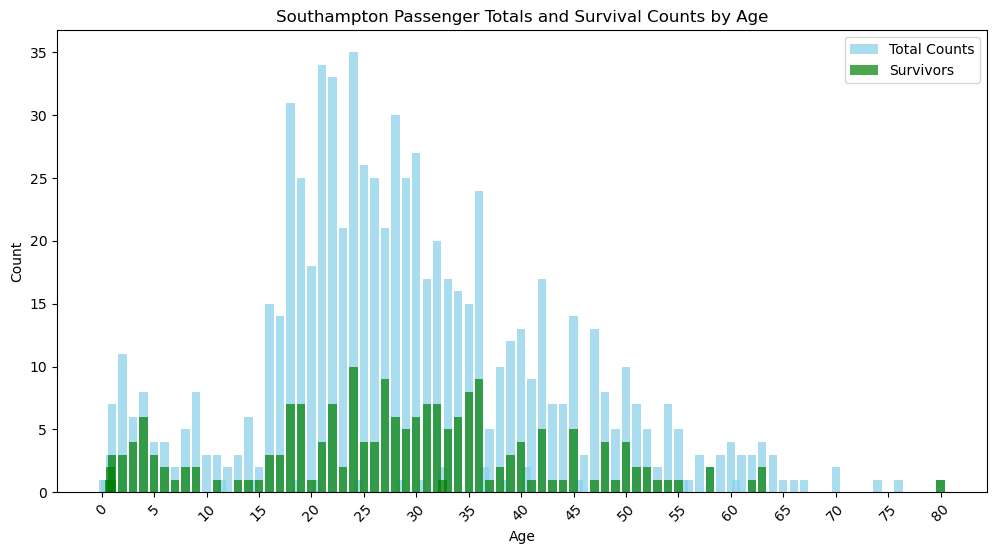

In [23]:
plotPortAges('S','Southampton')

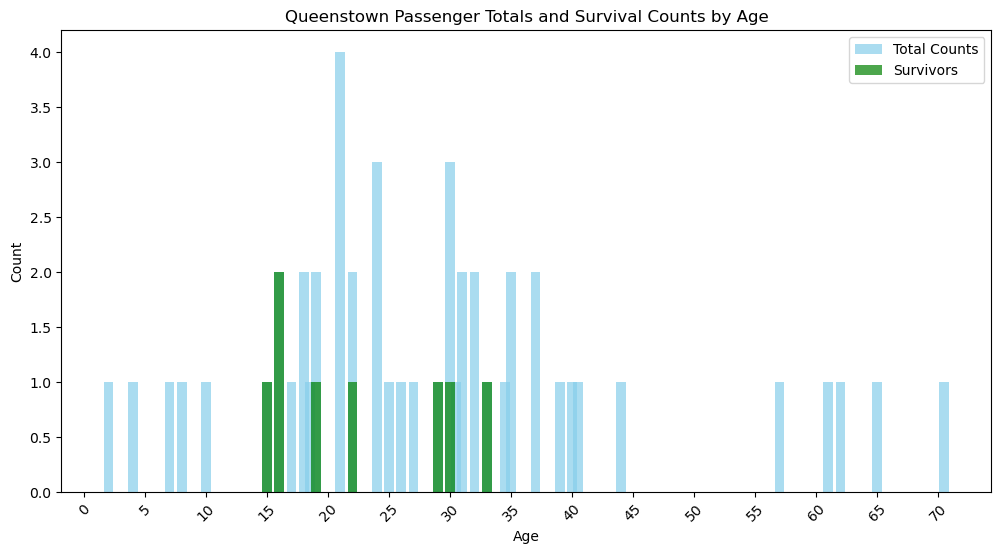

In [24]:
plotPortAges('Q','Queenstown')

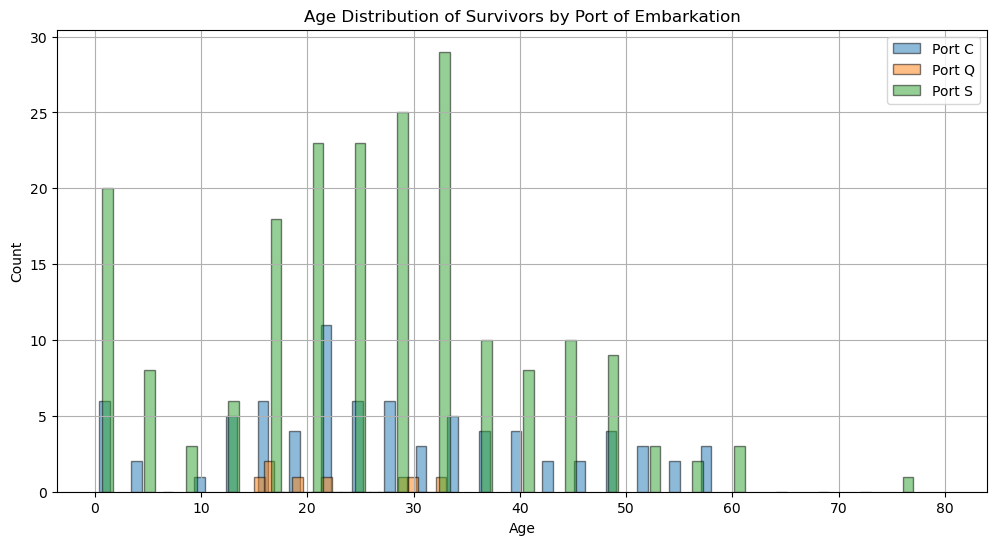

In [25]:
# Filter the DataFrame to include only passengers who survived
survived_df = df[df['Survived'] == 1]
survived_df_clean = survived_df.dropna(subset=['Embarked'])

# Plotting
plt.figure(figsize=(12, 6))

# Plot histograms for each port of embarkation
for port in sorted(survived_df_clean['Embarked'].unique()):
    # Filter the DataFrame for each port of embarkation
    port_df = survived_df_clean[survived_df_clean['Embarked'] == port]
    # Plot the histogram
    plt.hist(port_df['Age'], bins=20, alpha=0.5, width=1, label=f'Port {port}', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survivors by Port of Embarkation')
plt.legend()
plt.grid(True)

# Show plot
plt.show()